In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [10]:
#путь к данным нужно заменить
data = pd.read_csv('housing.csv', sep=',')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [11]:
#цель y столбец 14, "иксы" с 1 по 13
k = 13
X, y = data.drop([data.columns[k]], axis=1), data[data.columns[k]]
#конструктор признаков
poly = PolynomialFeatures(1, include_bias=False, interaction_only=True)
#делим на трейн и тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=48)
X_train, X_test = poly.fit_transform(X_train), poly.fit_transform(X_test)
X_train.shape, X_test.shape

((364, 13), (142, 13))

In [12]:
#скейлер сейчас "молчит"
scale = StandardScaler(with_mean=False, with_std=False)
#обучаем линейную модель (библиотечное решение)
model = LinearRegression(fit_intercept=False)
model = model.fit(X_train, y_train)
#средняя абсолютная ошибка при тестировании, коэффициент детерминации, число ненулевых
mean_absolute_error(model.predict(X_train), y_train), mean_absolute_error(model.predict(X_test), y_test)

(3.1301374617990136, 3.5358130915606254)

In [13]:
#теоретически точное решение
a = np.linalg.inv((X_train.T) @ X_train) @ X_train.T @ y_train
mean_absolute_error(X_train @ a, y_train), mean_absolute_error(X_test @ a, y_test)

(3.1301374617989763, 3.5358130915606134)


Задание выполняется по вариантам на основе файла housing.csv
Рекомендуется выполнить расчеты с использованием ноутбука .ipynb либо в
Google Colab
(всё нужное прикреплено в архиве)
Цель работы:
Предложить среднеквадратическую аппроксимацию табличной функции
многих переменных, проанализировать чувствительность точного решения к
ошибкам округления, проверить сходимость расчетных и исходных данных
Исходные данные:
После загрузки csv файла в среду для проведения расчетов нужно поменять
параметры test_size и random_state (см. таблицу с вариантами):
И всё, исходные данные для лабораторной работы готовы!
Содержание работы:
1. Составьте в матричном виде систему линейных алгебраических
уравнений для поиска коэффициентов среднеквадратического
приближения g, вычислите число обусловленности матрицы. Система
составляется на основе выборки train
2. Найдите решение системы при помощи обратной матрицы, проверьте
полученное приближение с использованием данных из обучающей и из
тестовой выборки отдельно (рассчитайте метрику mean_absolute_error,
сравните расчетные и исходные значения y (‘MEDV’) на графиках)
Повторите расчеты для матриц X-train, X_test, дополненных с помощью
конструктора PolynomialFeatures; выполните аналогичные расчеты при
активированном скейлере:

Пусть у нас дана следующая модель:
$$ X \cdot g + \varepsilon = y $$
где:
- $X$ - матрица коэффициентов
- $g$ - вектор коэффициентов
- $\varepsilon$ - вектор ошибок
- $y$ - вектор значений целевой переменной

Функция потерь - квадратичная:
$$ L = \left\| X \cdot g - y \right\|^2 $$
$$ L = \left( X \cdot g - y \right)^T \cdot \left( X \cdot g - y \right) $$
$$ L = g^T \cdot X^T \cdot X \cdot g - 2 \cdot g^T \cdot X^T \cdot y + y^T \cdot y $$

Возьмем производную функции потерь по вектору коэффициентов $g$:
$$ \frac{\partial L}{\partial g} = 2 \cdot X^T \cdot X \cdot g - 2 \cdot X^T \cdot y $$

Мы минимизируем функцию потерь, поэтому приравниваем производную к нулю:
$$ X^T \cdot X \cdot g = X^T \cdot y $$



In [14]:
# Вывод СЛАУ в матричном виде для поиска коэффициентов среднеквадратического приближения g
from sympy import Matrix, latex
from IPython.display import display, Math

X_XT = X_train.T @ X_train

A = Matrix(X_XT)

# Вектор переменных
x = Matrix([f'g{i}' for i in range(1, A.shape[1] + 1)])

XT_y = X_train.T @ y_train

b = Matrix(XT_y)

latex_str = (
    f'{latex(A)} \\cdot {latex(x)} = {latex(b)}'
)

display(Math(latex_str))

<IPython.core.display.Math object>

In [15]:
# Вычисление числа обусловленности матрицы
cond = np.linalg.cond(X_XT)
print(f'Число обусловленности матрицы: {cond:.2f}')

Число обусловленности матрицы: 83301199.66


Большое число обусловленности означает, что решение может быть неустойчивым.

Найдём решение системы при помощи обратной матрицы
$$ g = (X^T \cdot X)^{-1} \cdot X^T \cdot y $$

In [16]:
# Решение системы при помощи обратной матрицы
g = np.linalg.inv(X_XT) @ XT_y

g = Matrix(g)
display(Math(f'g = {latex(g)}'))

<IPython.core.display.Math object>

In [17]:
# Проверка полученного приближения
X_train_mae = mean_absolute_error(X_train @ g, y_train)
X_test_mae = mean_absolute_error(X_test @ g, y_test)
print(f'MAE для обучающей выборки: {X_train_mae:.2f}')
print(f'MAE для тестовой выборки: {X_test_mae:.2f}')

MAE для обучающей выборки: 3.13
MAE для тестовой выборки: 3.54


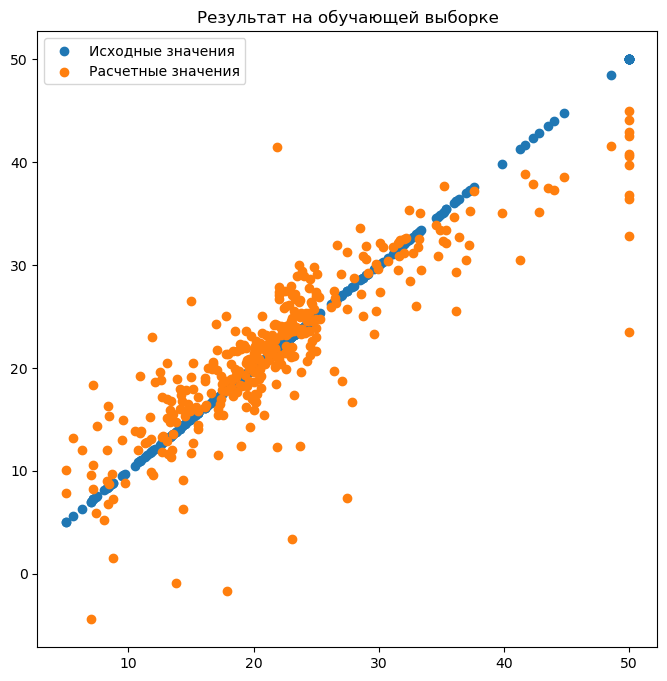

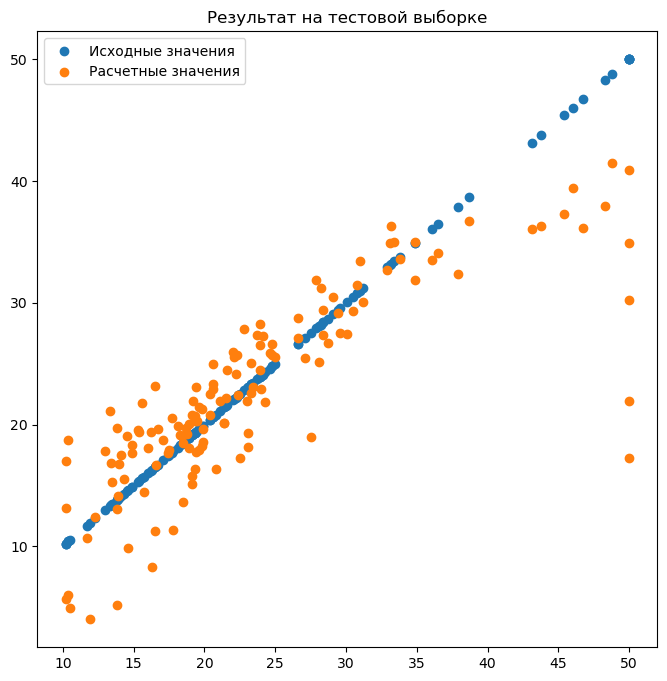

In [18]:
# Сравнение расчетных и исходных значений на графиках
plt.figure(figsize=(8, 8))
plt.scatter(y_train, y_train, label='Исходные значения')
plt.scatter(y_train, X_train @ g, label='Расчетные значения')
plt.legend()
plt.title('Результат на обучающей выборке')
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_test, label='Исходные значения')
plt.scatter(y_test, X_test @ g, label='Расчетные значения')
plt.legend()
plt.title('Результат на тестовой выборке')
plt.show()

In [26]:
# Расчеты для матриц X-train, X_test, дополненных с помощью конструктора PolynomialFeatures (степень от 1 до 10) и активированном/деактивированном скейлере
def calculate_mae(X_train, X_test, y_train, y_test, degree, scale):
    if scale:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    poly = PolynomialFeatures(degree, include_bias=False, interaction_only=True)
    X_train, X_test = poly.fit_transform(X_train), poly.fit_transform(X_test)

    X_XT = X_train.T @ X_train
    XT_y = X_train.T @ y_train

    g = np.linalg.inv(X_XT) @ XT_y

    X_train_mae = mean_absolute_error(X_train @ g, y_train)
    X_test_mae = mean_absolute_error(X_test @ g, y_test)

    return X_train_mae, X_test_mae, f'{np.linalg.cond(X_XT):.2f}'


results = pd.DataFrame(
    columns=['StandardScaler',
             'PolynomialFeatures',
             'mean_absolute_error (train)',
             'mean_absolute_error (test)',
             'np.linalg.cond(X_train.T@X_train)'])
results.index.name = ('№ эксперимента')

for attempt in range(2, 11, 2):
    results.loc[attempt - 1] = [False, attempt // 2,
                                *calculate_mae(X_train, X_test, y_train, y_test, attempt // 2, False)]
    results.loc[attempt] = [True, attempt // 2,
                            *calculate_mae(X_train, X_test, y_train, y_test, attempt // 2, True)]

results

,StandardScaler,PolynomialFeatures,mean_absolute_error (train),mean_absolute_error (test),np.linalg.cond(X_train.T@X_train)
№ эксперимента,,,,,
1,False,1,3.130137,3.535813e+00,83301199.66
2,True,1,22.149451,2.292258e+01,98.94
3,False,2,1.711425,2.668921e+00,4451572695358517.50
4,True,2,1.827603,2.699898e+00,30726855.21
5,False,3,93.205271,1.122533e+06,1948834760871528910966126280704.00
6,True,3,83.637753,1.309210e+06,124131060641450655744.00
7,False,4,1932.639390,5.035656e+12,259297728697907352088485245814308864.00
8,True,4,2953.960190,2.099583e+14,1102811444887440719872.00
9,False,5,10681.374291,1.082705e+14,1591891438461758816849440793302138880.00


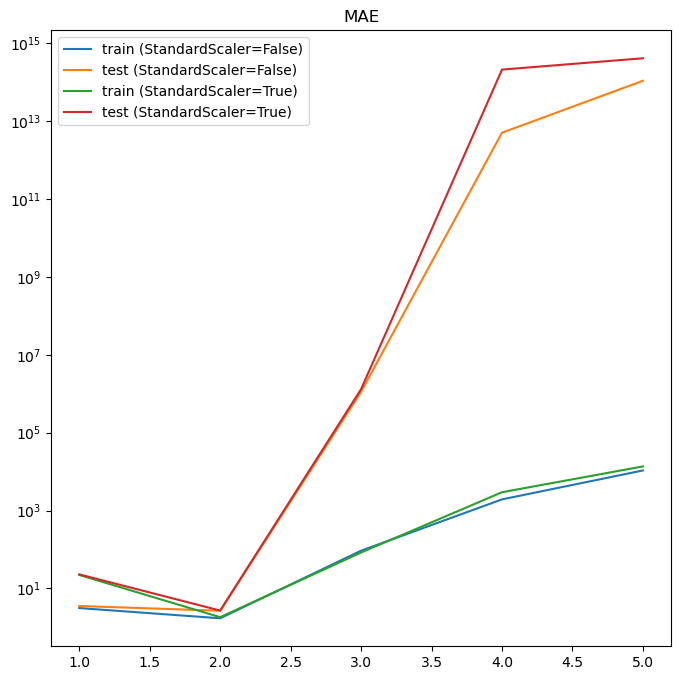

In [29]:
# Вывод результатов графически
plt.figure(figsize=(8, 8))
plt.plot(results[results['StandardScaler'] == False]['PolynomialFeatures'],
         results[results['StandardScaler'] == False]['mean_absolute_error (train)'],
         label='train (StandardScaler=False)')
plt.plot(results[results['StandardScaler'] == False]['PolynomialFeatures'],
            results[results['StandardScaler'] == False]['mean_absolute_error (test)'],
            label='test (StandardScaler=False)')
plt.plot(results[results['StandardScaler'] == True]['PolynomialFeatures'],
            results[results['StandardScaler'] == True]['mean_absolute_error (train)'],
            label='train (StandardScaler=True)')
plt.plot(results[results['StandardScaler'] == True]['PolynomialFeatures'],
            results[results['StandardScaler'] == True]['mean_absolute_error (test)'],
            label='test (StandardScaler=True)')
plt.yscale('log')
plt.legend()
plt.title('MAE')
plt.show()

# Вывод
Из графика видно, что использование масштабирования признаков позволяет улучшить качество модели.
При увеличении степени полинома увеличивается ошибка на тестовой выборке, что говорит о переобучении модели.